#PREGUNTA 4
#UNIV CONDORI YUJRA MOISES MARTIN

4.- Con el uso de librerías realiza en Python los mismos preprocesamiento del punto 3.

In [2]:
import pandas as pd
import numpy as np

# librerias para graficar
import seaborn as sns
import matplotlib.pyplot as plt
import random

# librerias para preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
url = 'https://raw.githubusercontent.com/moisesmartincy/DAT245---INTELIGENCIA-ARTIFICIAL/refs/heads/main/DATASETS/matchesmod1.csv'
datos = pd.read_csv(url, encoding="unicode_escape", on_bad_lines='skip');
dataset = datos.to_numpy()
titles = ['id','date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'golesloc', 'golesvis', 'opponent', 'golesesploc','golesespvis','poss','attendance','captain','formation','referee','match report','notes','tirosloc','tirosalarco','distpromtir','tiroslibloc','tirospenloc','tirospenintloc','season','team']
df = pd.DataFrame(dataset, columns=titles)
df

,id,date,time,comp,round,day,venue,result,golesloc,golesvis,...,match report,notes,tirosloc,tirosalarco,distpromtir,tiroslibloc,tirospenloc,tirospenintloc,season,team
0,0,9/21/2020,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,9/27/2020,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,10/3/2020,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,10/17/2020,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,10/24/2020,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,7/7/2020,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,...,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,7/11/2020,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,7/14/2020,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,...,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,7/18/2020,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,...,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


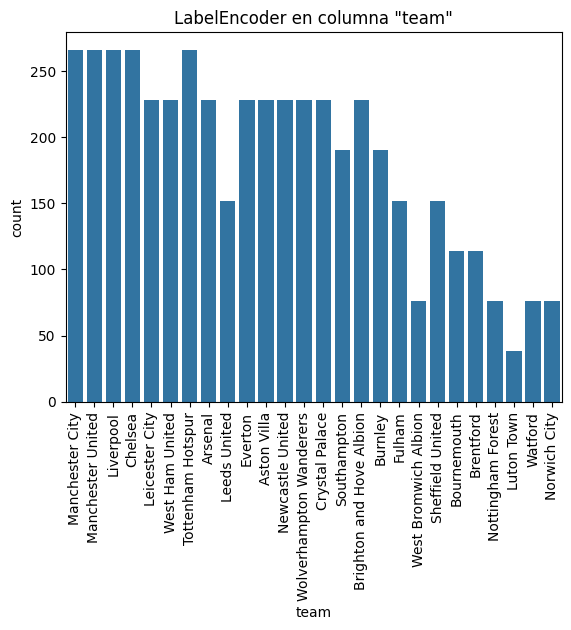

   id        date           time            comp        round  day venue  \
0   0   9/21/2020  20:15 (21:15)  Premier League  Matchweek 2  Mon  Away   
1   2   9/27/2020  16:30 (17:30)  Premier League  Matchweek 3  Sun  Home   
2   4   10/3/2020  17:30 (18:30)  Premier League  Matchweek 4  Sat  Away   
3   5  10/17/2020  17:30 (18:30)  Premier League  Matchweek 5  Sat  Home   
4   7  10/24/2020  12:30 (13:30)  Premier League  Matchweek 6  Sat  Away   

  result  golesloc  golesvis  ... team_18  team_19  team_20  team_21  team_22  \
0      W         3         1  ...     0.0      0.0      0.0      0.0      0.0   
1      L         2         5  ...     0.0      0.0      0.0      0.0      0.0   
2      D         1         1  ...     0.0      0.0      0.0      0.0      0.0   
3      W         1         0  ...     0.0      0.0      0.0      0.0      0.0   
4      D         1         1  ...     0.0      0.0      0.0      0.0      0.0   

  team_23 team_24 team_25 golesloc_discretizado  goleslo

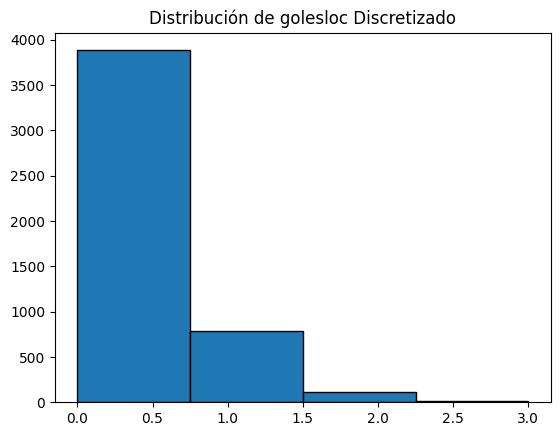

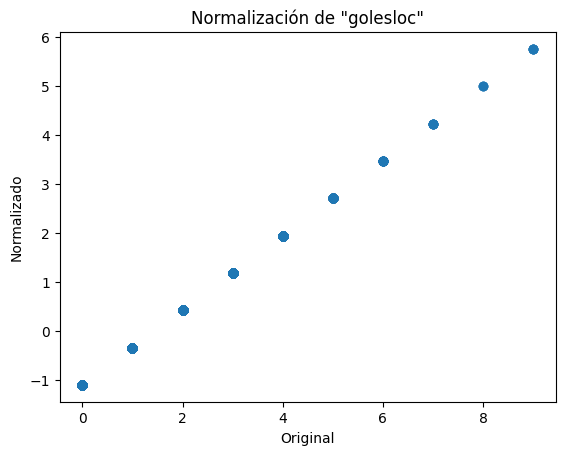

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, KBinsDiscretizer, StandardScaler

# Cargar el dataset
url = 'https://raw.githubusercontent.com/moisesmartincy/DAT245---INTELIGENCIA-ARTIFICIAL/refs/heads/main/DATASETS/matchesmod1.csv'
datos = pd.read_csv(url, encoding="unicode_escape", on_bad_lines='skip')

# LabelEncoder
label_encoder = LabelEncoder()
datos['team_encoded'] = label_encoder.fit_transform(datos['team'])

# OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Corregido sparse_output=False
team_encoded = one_hot_encoder.fit_transform(datos[['team']])
team_encoded_df = pd.DataFrame(team_encoded, columns=[f'team_{i}' for i in range(team_encoded.shape[1])])
datos = pd.concat([datos, team_encoded_df], axis=1)

# Discretización (KBinsDiscretizer)
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
datos['golesloc_discretizado'] = discretizer.fit_transform(datos[['golesloc']])

# Normalización (StandardScaler)
scaler = StandardScaler()
datos['golesloc_normalizado'] = scaler.fit_transform(datos[['golesloc']])

# Visualización de LabelEncoder
sns.countplot(x='team', data=datos)
plt.title('LabelEncoder en columna "team"')
plt.xticks(rotation=90)
plt.show()

# Visualización de OneHotEncoder (mostramos las primeras filas)
print(datos.head())

# Visualización de Discretización
plt.hist(datos['golesloc_discretizado'], bins=4, edgecolor='k')
plt.title('Distribución de golesloc Discretizado')
plt.show()

# Visualización de Normalización
plt.scatter(datos['golesloc'], datos['golesloc_normalizado'])
plt.title('Normalización de "golesloc"')
plt.xlabel('Original')
plt.ylabel('Normalizado')
plt.show()
